## IMHOTEP: Time STD and Trend against Global mean freshwater discharges of rivers
From the freshwater runoff forcing of IMHOTEP experiment (NEMO).

1. Load data
2. Compute the time mean, time STD and the trend of runoffs at Global scale
3. Plot time STD of Runoffs and their trend as function of time mean at Global scale
4. Select the subregion of Amazon mouth and Orinoco

### Import modules

In [1]:
## standard libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


In [2]:
prefix = "eORCA025.L75-IMHOTEP"

# NAME of ENSEMBLE EXPERIMENT:
# "EGAI": all runoffs varying
# "ES": all runoffs climatological
nexp = "EGAI"

varnasss = 'sosaline'

# ensemble size
NE=10

# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/dec2022/"+fo+"/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"


### **1. Load data**

* Find directory and file list

In [3]:
# Runoffs directory
diridat = li.Ffindinputdata(nexp,prefix=prefix)

#  Runoffs file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")
print(rnffiles)
varnarnf = 'sornf'

/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI*flxT.nc


* Load data

In [4]:
# select the imhov instance you want to load : RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)

# load the data in this imhov instance
RNF1.loaddata()

# load grid info
RNF1.loadgridinfo()

# convert kg.m2 of freshwwater per second into m3/s
RNF1.convertRNF()

# detrend your data
RNF1.detrend()

### **2. Compute the time mean, time STD and the trend of runoffs at Global scale**

In [5]:
# maximum mean runoff
print("maximum mean runoff :",RNF1.data.mean(dim='time_counter').max().values)
# maximum std runoff
print("maximum std runoff : ",RNF1.data.std(dim='time_counter').max().values)
# maximum trend
print("maximum trend : ",RNF1.atr.max().values)


maximum mean runoff : 63985.99519249489
maximum std runoff :  7546.2124022420785
maximum trend :  128.023794018228


In [6]:
# time mean
tm = RNF1.data.mean(dim='time_counter').compute()
#stacked_tm = tm.stack(z=("x", "y"))
arrtm= tm.to_numpy()

In [7]:
#time STD
tstd = RNF1.data.std(dim='time_counter').compute()
#stacked_tstd = tstd.stack(z=("x", "y"))
arrtstd = tstd.to_numpy()

In [27]:
# positive trend
trp = RNF1.atr.where(RNF1.atr>0) 
# negative trend
trn = RNF1.atr.where(RNF1.atr<0)

arrtrp = trp.to_numpy()
arrtrn = trn.to_numpy()

In [8]:
#trend (all values)
tr = RNF1.atr
arrtr = tr.to_numpy()

### **3. Plot time STD of Runoffs and their trend as function of time mean at Global scale** 

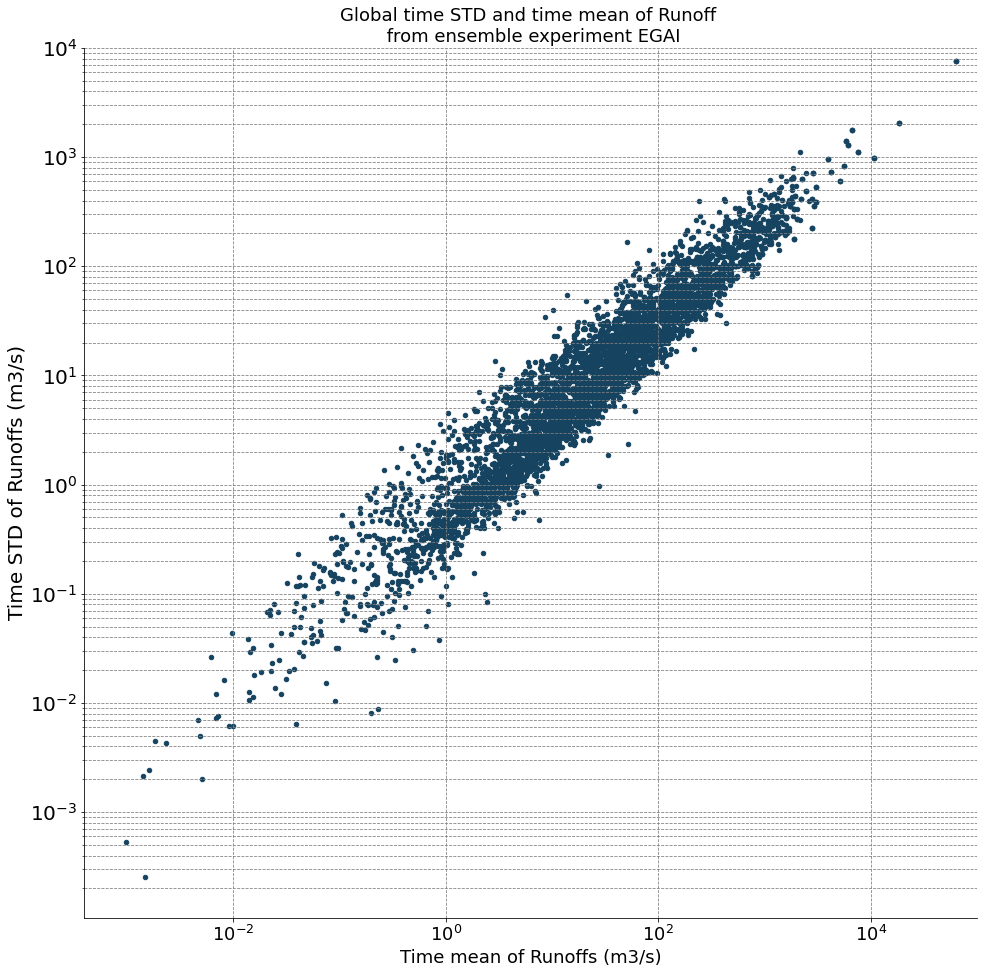

In [9]:
# name of the file in case you want to save it 
namo="std_tm_GLO_LOG-RNF_"+nexp+"_1980-2018"
gp = 0

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

# plot timeseries
fig1 = plt.figure(figsize=([16,16]),facecolor='white')  

# colors
c1="#154360"
c2= "#e74c3c"


# plot of the data: x= time mean of runoffs, y= time STD of runoffs
plt.scatter(x=arrtm,y=arrtstd,s=20, c=c1)

# use the log/log scale
plt.yscale('log')
plt.xscale('log')

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# add legend and choose where it will appear
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower right')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time mean of Runoffs (m3/s)")
plt.ylabel("Time STD of Runoffs (m3/s)")


# set the limits of the plot on x axis
plt.xlim(0,100000)

# set the limits of the plot on y axis
plt.ylim(0,10000)

# plot title

plt.title('Global time STD and time mean of Runoff \n from ensemble experiment '+nexp,fontsize=18)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)

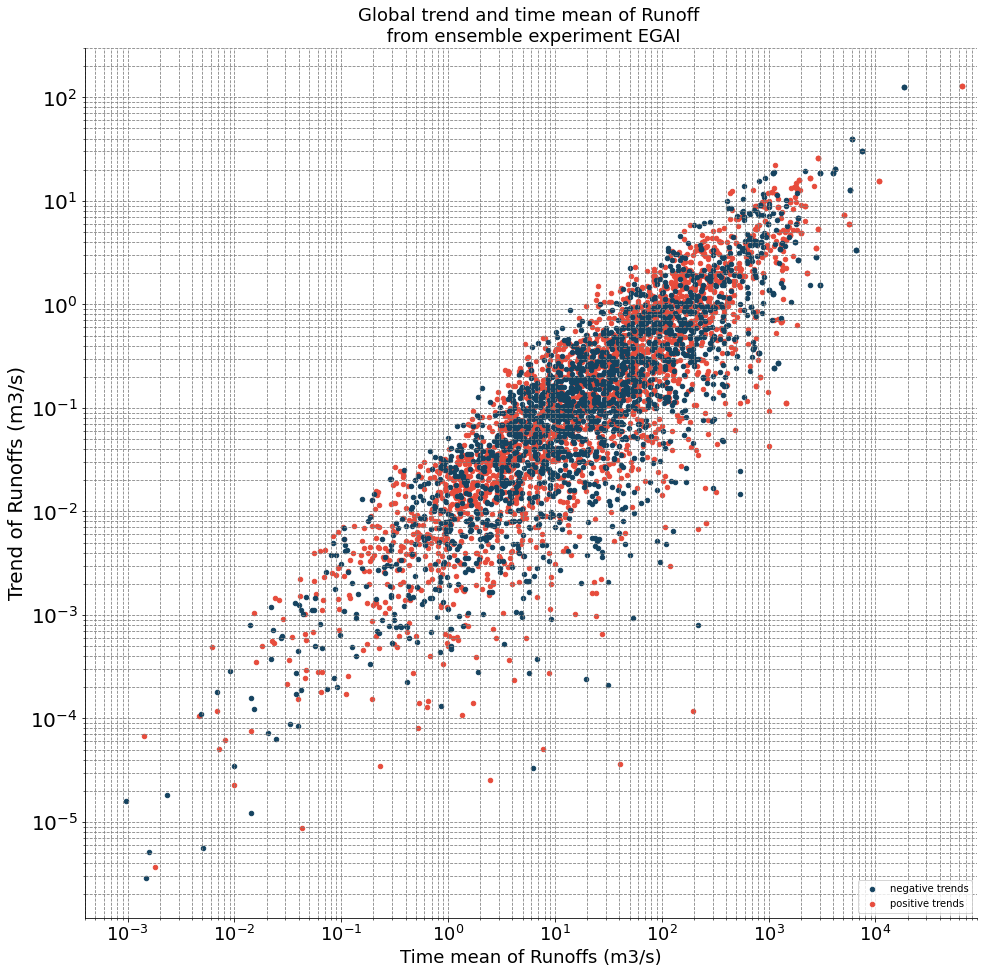

In [36]:
# name of the file in case you want to save it 
namo="tr_tm_GLO_LOG-RNF_"+nexp+"_1980-2018"
gp = 0

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

# plot timeseries
fig1 = plt.figure(figsize=([16,16]),facecolor='white')  

# colors
c1="#154360"
c2= "#e74c3c"


# plot of the data: x= time mean of runoffs, y= positive (red) or negative trend (blue) of runoffs
plt.scatter(x=arrtm,y=arrtrp,s=20, c=c2, label ='positive trends')
plt.scatter(x=arrtm,y=abs(arrtrn),s=20, c=c1, label ='negative trends')


# use the log/log scale
plt.yscale('log')
plt.xscale('log')

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower right')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time mean of Runoffs (m3/s)")
plt.ylabel("Trend of Runoffs (m3/s)")


# set the limits of the plot on x axis
plt.xlim(0,90000)

# set the limits of the plot on y axis
plt.ylim(0,300)

# plot title

plt.title('Global trend and time mean of Runoff \n from ensemble experiment '+nexp,fontsize=18)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)

### **4. Select the subregion of Amazon mouth and Oronoco**

* Few data needed for grid, lat and lon

In [59]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

* Select only Oronoco and Amazon mouth

In [60]:
#============================== Amazon mouth
# latitude and longitude values you want to select the region over
lonselect1=[-50.8,-47.8]
latselect1=[-2,2]

# Find x and y (xselect, yselect) indices you want to select the region over.
for p in range(2):
    # Finds (i,j) = (x,y) coordinates nearest to latitude and longitude values
    [i,j] = li.Ffindij(dirigrid, lonselect1[p], latselect1[p])
    if p==0:
        xi=i
        yi=j
    else:
        xj=i
        yj=j
        
xselect1 =[xi,xj]
yselect1 =[yi,yj]

print(xselect1)
print(yselect1)

[946, 958]
[676, 692]


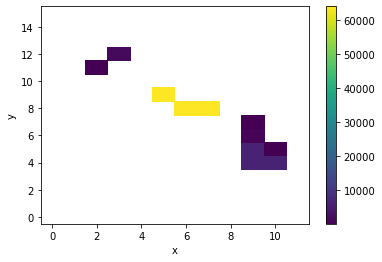

In [61]:
# Quick plot to check

#select runoffs in the selected region
rnfselmap1 = RNF1.data.isel(x=slice(xselect1[0],xselect1[1]),y=slice(yselect1[0],yselect1[1])).squeeze() 

# select only the positive runoffs
Amouth = rnfselmap1.where(rnfselmap1>0).squeeze()

# plot of the time mean
Amouth.mean(dim='time_counter').plot()

In [62]:
#============================== Oronoco mouth
# latitude and longitude values you want to select the region over
lonselect2=[-63,-60]
latselect2=[8,11]

# Find x and y (xselect, yselect) indices you want to select the region over.
for p in range(2):
    # Finds (i,j) = (x,y) coordinates nearest to latitude and longitude values
    [i,j] = li.Ffindij(dirigrid, lonselect2[p], latselect2[p])
    if p==0:
        xi=i
        yi=j
    else:
        xj=i
        yj=j
        
xselect2 =[xi,xj]
yselect2 =[yi,yj]

print(xselect2)
print(yselect2)

[897, 909]
[716, 728]


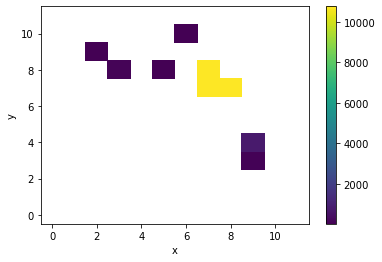

In [63]:
# Quick plot to check

#select runoffs in the selected region
rnfselmap2 = RNF1.data.isel(x=slice(xselect2[0],xselect2[1]),y=slice(yselect2[0],yselect2[1])).squeeze() 

# select only the positive runoffs
Omouth = rnfselmap2.where(rnfselmap2>0).squeeze()

# plot of the time mean
Omouth.mean(dim='time_counter').plot()

### **5. Compute the time mean and time STD of runoffs in the subregions**

* Amazon mouth

In [64]:
# time mean
tmA = Amouth.mean(dim='time_counter').compute()
#stacked_tmA = tmA.stack(z=("x", "y"))
arrtmA= tmA.to_numpy()

In [65]:
#time STD
tstdA = Amouth.std(dim='time_counter').compute()
#stacked_tstdA = tstdA.stack(z=("x", "y"))
arrtstdA= tstdA.to_numpy()

* Oronoco mouth

In [66]:
# time mean
tmO = Omouth.mean(dim='time_counter').compute()
#stacked_tmO = tmO.stack(z=("x", "y"))
arrtmO= tmO.to_numpy()

In [67]:
#time STD
tstdO = Omouth.std(dim='time_counter').compute()
#stacked_tstdO = tstdO.stack(z=("x", "y"))
arrtstdO= tstdO.to_numpy()

### **6. Plot time STD of Runoffs as function of time mean in the subregions** 

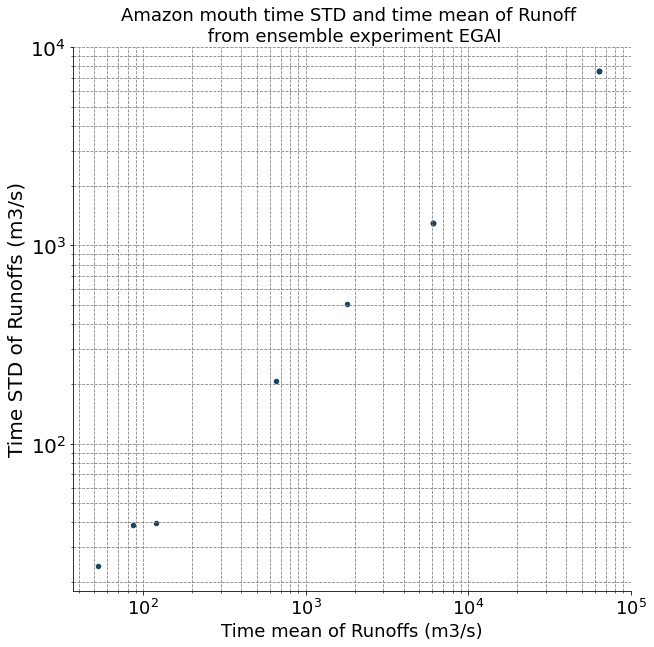

In [75]:
# name of the file in case you want to save it 
namo="std_tm_Amouth_LOG-RNF_"+nexp+"_1980-2018"
gp = 0

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

# plot timeseries
fig1 = plt.figure(figsize=([10,10]),facecolor='white')  

# colors
c1="#154360"
c2= "#e74c3c"


# plot of the data: x= time mean of runoffs, y= time STD of runoffs
plt.scatter(x=arrtmA,y=arrtstdA,s=20, c=c1)

# use the log/log scale
plt.yscale('log')
plt.xscale('log')


# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# add legend and choose where it will appear
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower right')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time mean of Runoffs (m3/s)")
plt.ylabel("Time STD of Runoffs (m3/s)")


# set the limits of the plot on x axis
plt.xlim(0,100000)

# set the limits of the plot on y axis
plt.ylim(0,10000)

# plot title

plt.title('Amazon mouth time STD and time mean of Runoff \n from ensemble experiment '+nexp,fontsize=18)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)

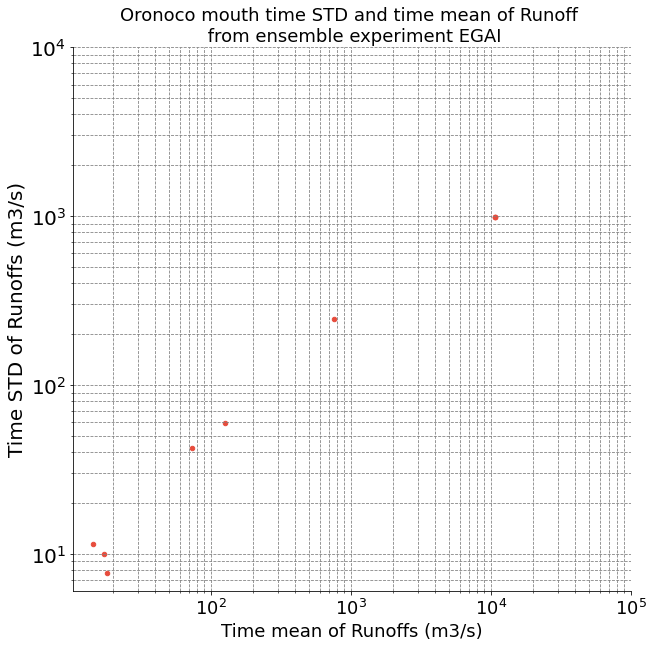

In [84]:
# name of the file in case you want to save it 
namo="std_tm_Omouth_LOG-RNF_"+nexp+"_1980-2018"
gp = 0

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/Runoffs/"

# plot timeseries
fig2 = plt.figure(figsize=([10,10]),facecolor='white')  

# colors
c1="#154360"
c2= "#e74c3c"


# plot of the data: x= time mean of runoffs, y= time STD of runoffs
plt.scatter(x=arrtmO,y=arrtstdO,s=20, c=c2)

# use the log/log scale
plt.yscale('log')
plt.xscale('log')

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# add legend and choose where it will appear
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower right')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time mean of Runoffs (m3/s)")
plt.ylabel("Time STD of Runoffs (m3/s)")


# set the limits of the plot on x axis
plt.xlim(0,100000)

# set the limits of the plot on y axis
plt.ylim(0,10000)

# plot title

plt.title('Oronoco mouth time STD and time mean of Runoff \n from ensemble experiment '+nexp,fontsize=18)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig2,diro,namo,dpifig=300)